## File with metrics and graphs used in comparing different BMP280

In [1]:
import pandas as pd
data = pd.read_csv("comparisonTwoSensors.csv")
data

,Date,Time,Atmospheric pressure 1,Temperature 1,Atmospheric pressure 2,Temperature 2
0,2024/05/09,16:49,956.9403,24.5897,956.4305,24.2790
1,2024/05/09,16:49,956.9523,24.5757,956.4236,24.2755
2,2024/05/09,16:49,956.9495,24.5744,956.4152,24.2791
3,2024/05/09,16:49,956.9447,24.5798,956.4163,24.2784
4,2024/05/09,16:49,956.9504,24.5904,956.4302,24.2880
...,...,...,...,...,...,...
12061,2024/05/10,09:42,958.3671,25.0026,957.8658,24.6509
12062,2024/05/10,09:42,958.3736,24.9887,957.8719,24.6390
12063,2024/05/10,09:42,958.3732,24.9738,957.8591,24.6272
12064,2024/05/10,09:42,958.3762,24.9649,957.8687,24.6253


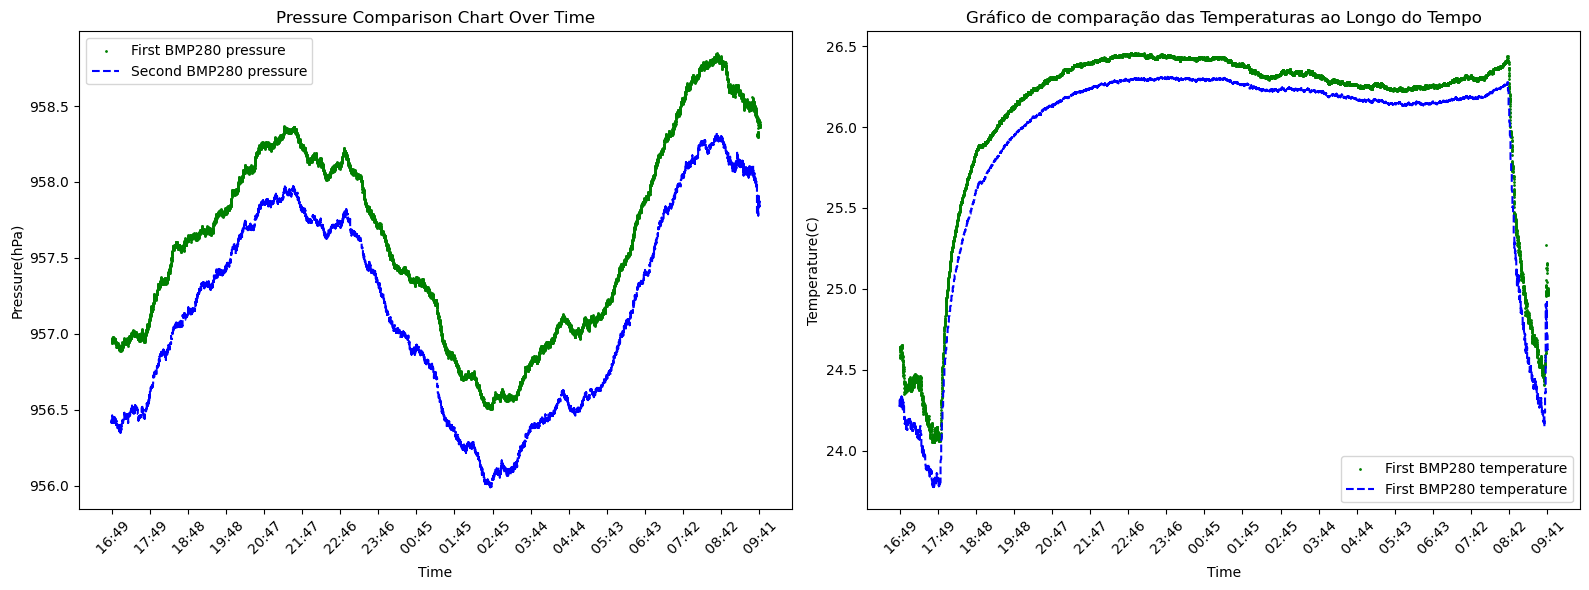

In [2]:
import matplotlib.pyplot as plt

# Setting the size of the figure
plt.figure(figsize=(16, 6))  # Adjust the size as desired

# Subplot for altitude graph
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.scatter(data["Time"], data["Atmospheric pressure 1"], color='green', label='First BMP280 pressure', s=1)
plt.plot(data["Time"], data["Atmospheric pressure 2"], color='blue', linestyle='--', label='Second BMP280 pressure')
plt.xlabel("Time")
plt.ylabel("Pressure(hPa)")
plt.title("Pressure Comparison Chart Over Time")
plt.xticks(rotation=45)
plt.legend()

total_points = len(data["Time"])
distance = total_points // 17
plt.xticks(data["Time"][::distance], rotation=45)

plt.subplot(1, 2, 2)  # 1 row, 2 columns, first subplot
plt.scatter(data["Time"], data["Temperature 1"], color='green', label='First BMP280 temperature', s=1)
plt.plot(data["Time"], data["Temperature 2"], color='blue', linestyle='--', label='First BMP280 temperature')
plt.xlabel("Time")
plt.ylabel("Temperature(C)")
plt.title("Gráfico de comparação das Temperaturas ao Longo do Tempo")
plt.xticks(rotation=45)
plt.legend()

total_points = len(data["Time"])
distance = total_points // 17
plt.xticks(data["Time"][::distance], rotation=45)
# Layout adjustment to avoid overlapping
plt.tight_layout()

# Displaying subplots
plt.show()


### Using Altitude Formulas

![Fórmula de Altitude a partir da Fórmula Barométrica](images\Capturar.PNG)


In the barometric formula described above, we have:
* h = Altitude
* P = Measured Pressure
* Po = Reference Pressure, at sea level

It is noted that without the presence of temperature there is no way to balance the measured values.

In [2]:
import math 

altitude_without_temp_1 = [] # List that will become a column of the DataFrame

po = 1013.25 # Sea level pressure

for i in range(0, len(data["Atmospheric pressure 1"])):
    pressureN = data["Atmospheric pressure 1"].iloc[i]
    altitude = 44330.0 * (1.0 - ((pressureN) / po) ** (1.0 / 5.255))
    altitude_without_temp_1.append(round(altitude, 2))

data['Altitude(without/Temp) First Sensor'] = altitude_without_temp_1

altitude_without_temp_2 = []

for i in range(0, len(data["Atmospheric pressure 2"])):
    pressureN = data["Atmospheric pressure 2"].iloc[i]
    altitude = 44330.0 * (1.0 - ((pressureN) / po) ** (1.0 / 5.255))
    altitude_without_temp_2.append(round(altitude, 2))

data['Altitude(without/Temp) Second Sensor'] = altitude_without_temp_2



# Saving the updated DataFrame back to the .csv file
data.to_csv('formattedData.csv', index=False)
data

,Date,Time,Atmospheric pressure 1,Temperature 1,Atmospheric pressure 2,Temperature 2,Altitude(without/Temp) First Sensor,Altitude(without/Temp) Second Sensor
0,2024/05/09,16:49,956.9403,24.5897,956.4305,24.2790,479.72,484.17
1,2024/05/09,16:49,956.9523,24.5757,956.4236,24.2755,479.62,484.23
2,2024/05/09,16:49,956.9495,24.5744,956.4152,24.2791,479.64,484.30
3,2024/05/09,16:49,956.9447,24.5798,956.4163,24.2784,479.68,484.29
4,2024/05/09,16:49,956.9504,24.5904,956.4302,24.2880,479.63,484.17
...,...,...,...,...,...,...,...,...
12061,2024/05/10,09:42,958.3671,25.0026,957.8658,24.6509,467.29,471.65
12062,2024/05/10,09:42,958.3736,24.9887,957.8719,24.6390,467.23,471.60
12063,2024/05/10,09:42,958.3732,24.9738,957.8591,24.6272,467.23,471.71
12064,2024/05/10,09:42,958.3762,24.9649,957.8687,24.6253,467.21,471.63


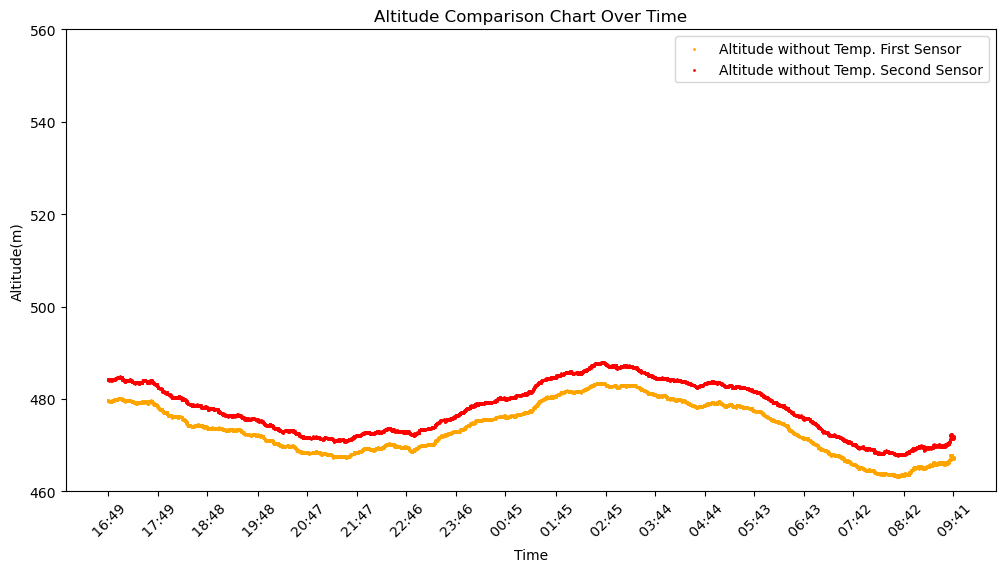

In [4]:

plt.figure(figsize=(12, 6))  # Figure dimensions

lower_limit_Y = 460
upper_limit_Y = 560

# Plotting Altitude with Temperature - First Formula
plt.scatter(data["Time"], data["Altitude(without/Temp) First Sensor"], color='orange', label='Altitude without Temp. First Sensor', s=1)

# Plotting altitude with temperature - First fórmula
plt.scatter(data["Time"], data["Altitude(without/Temp) Second Sensor"], color='red', label='Altitude without Temp. Second Sensor', s=1)

plt.xlabel("Time")  # Time as X-axis of the graph
plt.ylabel("Altitude(m)")  # Altitude as Y axis of graph
plt.title("Altitude Comparison Chart Over Time")

# Setting X-axis limits and ranges
total_points = len(data["Time"])
distance = total_points // 17
plt.xticks(data["Time"][::distance], rotation=45)

plt.ylim(lower_limit_Y, upper_limit_Y)
plt.legend()
plt.show()


In [5]:
maximum = data["Altitude(without/Temp) First Sensor"].max()
minimum = data["Altitude(without/Temp) First Sensor"].min()
range = maximum - minimum

# Printing the maximum and minimum value
print("Maximum:", maximum)
print("Minimum:", minimum)
print("Range: {:.2f}".format(range))

Maximum: 483.53
Minimum: 463.09
Range: 20.44


### Second Altitude Formula / Calculating from a Reference Frame

![Fórmula de Altitude a partir da Fórmula Hipsométrica](images\Capturar4.PNG)


The variables are:

* K is a constant and is equal to 67.4073 when the height is in meters
* Tm is the temperature measured in Kelvin
* P1 is the pressure on the reference ground
* P2 is the pressure at the second point
* H is the height measured between points P2 and P1

In [3]:
altitude_second_formula = [] # List that will become a column of the DataFrame

po = 1013.25 # Sea level pressure

for i in range(0, len(data["Atmospheric pressure 1"])):
    pressureN1 = data["Atmospheric pressure 1"].iloc[i]
    pressureN2 = data["Atmospheric pressure 2"].iloc[i]
    tempN = data["Temperature 1"].iloc[i]
    
    altitude = 67.4073*(tempN + 273)*math.log(pressureN1 / pressureN2)
    altitude_second_formula.append(round(altitude, 2))

data['Altitude with a Referencial'] = altitude_second_formula

# Saving the updated DataFrame back to the .csv file
data.to_csv('formattedData.csv', index=False)
data

,Date,Time,Atmospheric pressure 1,Temperature 1,Atmospheric pressure 2,Temperature 2,Altitude(without/Temp) First Sensor,Altitude(without/Temp) Second Sensor,Altitude with a Referencial
0,2024/05/09,16:49,956.9403,24.5897,956.4305,24.2790,479.72,484.17,10.69
1,2024/05/09,16:49,956.9523,24.5757,956.4236,24.2755,479.62,484.23,11.09
2,2024/05/09,16:49,956.9495,24.5744,956.4152,24.2791,479.64,484.30,11.20
3,2024/05/09,16:49,956.9447,24.5798,956.4163,24.2784,479.68,484.29,11.08
4,2024/05/09,16:49,956.9504,24.5904,956.4302,24.2880,479.63,484.17,10.91
...,...,...,...,...,...,...,...,...,...
12061,2024/05/10,09:42,958.3671,25.0026,957.8658,24.6509,467.29,471.65,10.51
12062,2024/05/10,09:42,958.3736,24.9887,957.8719,24.6390,467.23,471.60,10.52
12063,2024/05/10,09:42,958.3732,24.9738,957.8591,24.6272,467.23,471.71,10.78
12064,2024/05/10,09:42,958.3762,24.9649,957.8687,24.6253,467.21,471.63,10.64


In [5]:
maximum = data["Altitude with a Referencial"].max()
minimum = data["Altitude with a Referencial"].min()

# Printing the maximum and minimum value
print("Maximum:", maximum)
print("Minimum:", minimum)

Maximum: 12.39
Minimum: 6.67


### Using the barometric formula with a nearby reference

In [4]:
altitude_barometric_reference = [] # lista que virá a ser uma coluna do DataFrame

for i in range(0, len(data["Atmospheric pressure 1"])):
    pressureN1 = data["Atmospheric pressure 1"].iloc[i]
    pressureN2 = data["Atmospheric pressure 2"].iloc[i]
    
    altitude = 44330 * (1.0 - pow((pressureN2)/pressureN1, (1/5.255)))
    altitude_barometric_reference.append(round(altitude, 2))

data['Altitude Barometric fórmula with reference'] = altitude_barometric_reference

# Salvando o DataFrame atualizado de volta ao arquivo .csv
data.to_csv('dadosFormatados.csv', index=False)
data

,Date,Time,Atmospheric pressure 1,Temperature 1,Atmospheric pressure 2,Temperature 2,Altitude(without/Temp) First Sensor,Altitude(without/Temp) Second Sensor,Altitude with a Referencial,Altitude Barometric fórmula with reference
0,2024/05/09,16:49,956.9403,24.5897,956.4305,24.2790,479.72,484.17,10.69,4.50
1,2024/05/09,16:49,956.9523,24.5757,956.4236,24.2755,479.62,484.23,11.09,4.66
2,2024/05/09,16:49,956.9495,24.5744,956.4152,24.2791,479.64,484.30,11.20,4.71
3,2024/05/09,16:49,956.9447,24.5798,956.4163,24.2784,479.68,484.29,11.08,4.66
4,2024/05/09,16:49,956.9504,24.5904,956.4302,24.2880,479.63,484.17,10.91,4.59
...,...,...,...,...,...,...,...,...,...,...
12061,2024/05/10,09:42,958.3671,25.0026,957.8658,24.6509,467.29,471.65,10.51,4.41
12062,2024/05/10,09:42,958.3736,24.9887,957.8719,24.6390,467.23,471.60,10.52,4.42
12063,2024/05/10,09:42,958.3732,24.9738,957.8591,24.6272,467.23,471.71,10.78,4.53
12064,2024/05/10,09:42,958.3762,24.9649,957.8687,24.6253,467.21,471.63,10.64,4.47


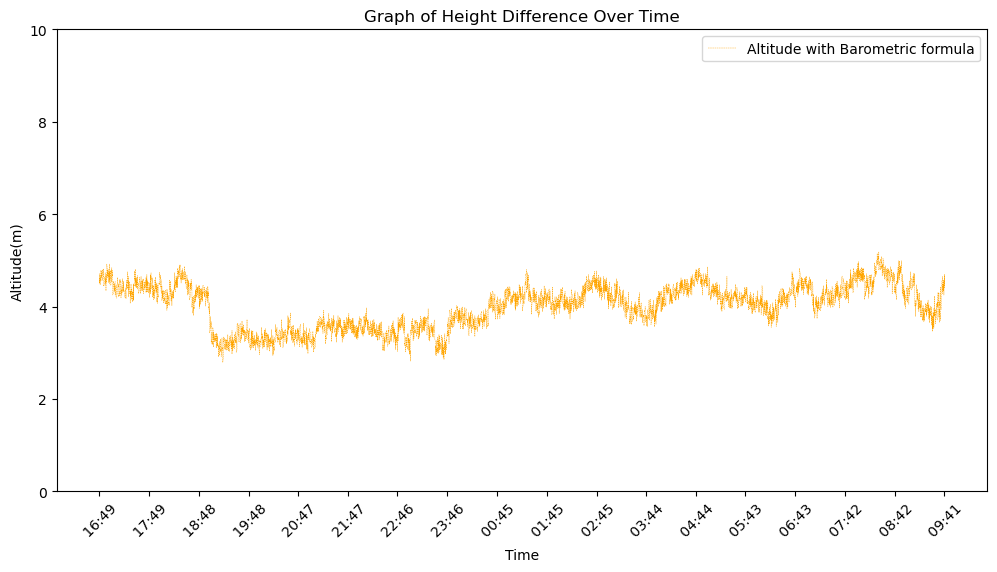

In [7]:

plt.figure(figsize=(12, 6))  # Figure dimensions

lower_limit_Y = 0
upper_limit_Y = 10

# Plotting Altitude with Temperature - Second Formula
plt.plot(data["Time"], data["Altitude Barometric fórmula with reference"], color='orange', linestyle='--', linewidth=0.3, label='Altitude with Barometric formula')


plt.xlabel("Time")  # Time as X-axis of the graph
plt.ylabel("Altitude(m)")  # Altitude as Y axis of graph
plt.title("Graph of Height Difference Over Time")

# Setting X-axis limits and ranges
total_points = len(data["Time"])
distance = total_points // 17
plt.xticks(data["Time"][::distance], rotation=45)

plt.ylim(lower_limit_Y, upper_limit_Y)
plt.legend()
plt.show()


In [8]:
maximum = data["Altitude Barometric fórmula with reference"].max()
minimum = data["Altitude Barometric fórmula with reference"].min()
range = maximum - minimum

# Printing the maximum and minimum value
print("Maximum:", maximum)
print("Minimum:", minimum)
print("Range: {:.2f}".format(range))

Maximum: 5.18
Minimum: 2.79
Range: 2.39


### Calculando a Diferença entre as Pressões

In [5]:
range = data["Atmospheric pressure 1"] - data["Atmospheric pressure 2"]
range = round(range, 2)

maximum = max(range)
mean = range.mean()
print("Range difference: {:.2f}hpa".format(maximum))
print("Range mean: {:.2f}hpa".format(mean))

Range difference: 0.59hpa
Range mean: 0.45hpa


#### Now that the "Off-set" has been found, I will attribute this average difference in the calculation made above, in order to eliminate the divergence inherent to each unit of the BMP280.

In [10]:
print(mean)

0.454379247472236


In [6]:
altitude_barometric_reference = [] # lista que virá a ser uma coluna do DataFrame

for i in range(0, len(data["Atmospheric pressure 1"])):
    pressureN1 = data["Atmospheric pressure 1"].iloc[i]
    pressureN2 = data["Atmospheric pressure 2"].iloc[i] + mean
    
    altitude = 44330 * (1.0 - pow((pressureN2)/pressureN1, (1/5.255)))
    altitude_barometric_reference.append(round(altitude, 2))

data['Barometric fórmula with reference - Offset'] = altitude_barometric_reference

# Salvando o DataFrame atualizado de volta ao arquivo .csv
data.to_csv('dadosFormatados.csv', index=False)
data

TypeError: 'Series' object is not callable

In [ ]:
data

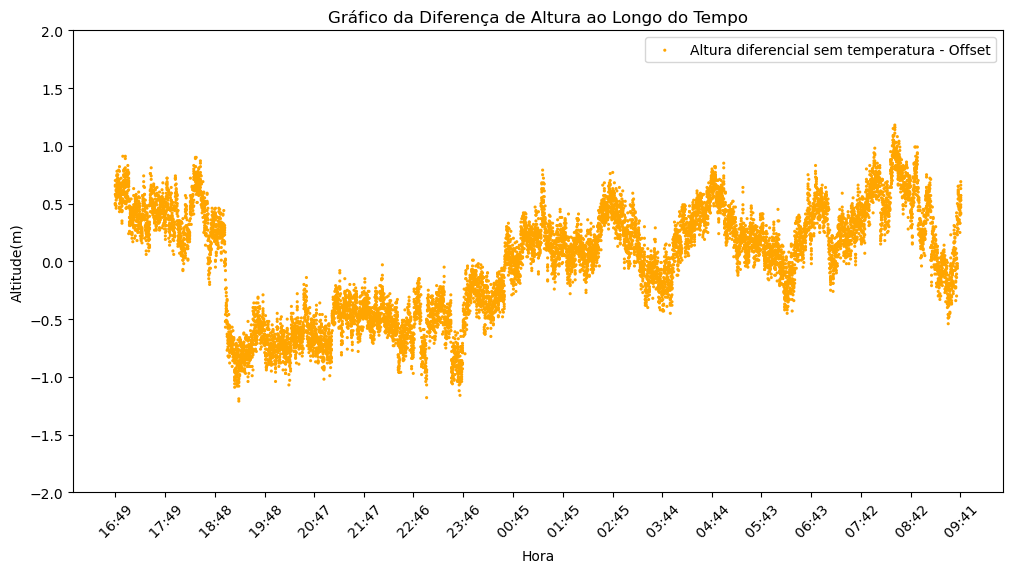

In [95]:

plt.figure(figsize=(12, 6))  # Figure dimensions

lower_limit_Y = -2
upper_limit_Y = 2

# Plotting Altitude with Temperature - Second Formula
plt.scatter(data["Time"], data["Barometric fórmula with reference - Offset"], color='orange', linestyle='--', linewidth=0.01, label='Barometric fórmula with reference - Offset', s = 5)


plt.xlabel("Time")  # Time as X-axis of the graph
plt.ylabel("Altitude(m)")  # Altitude as Y axis of graph
plt.title("Graph of Height Difference Over Time")

# Setting X-axis limits and ranges
total_points = len(data["Time"])
distance = total_points // 17
plt.xticks(data["Time"][::distance], rotation=45)

plt.ylim(lower_limit_Y, upper_limit_Y)
plt.legend()
plt.show()


In [97]:
maximum = data["Barometric fórmula with reference - Offset"].max()
minimum = data["Barometric fórmula with reference - Offset"].min()
range = maximum - minimum

# Printing the maximum and minimum value
print("Maximum:", maximum)
print("Minimum:", minimum)
print("Range: {:.2f}".format(range))

Máximo: 1.18
Mínimo: -1.21
